In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data_url = "https://raw.githubusercontent.com/FundamentalsPythonYello/data-analysis-0/master/Sales_Data/Sales_April_2019.csv"
df = pd.read_csv(data_url, index_col = 0)
df[:5]

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Order ID,,,,,
176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
NaN,NaN,NaN,NaN,NaN,NaN
176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
df['Month'] = 'column'
df.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
Order ID,,,,,,
176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",column
NaN,NaN,NaN,NaN,NaN,NaN,column
176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",column
176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",column
176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",column


In [5]:
df['Month'] = df['Order Date'].str[0:2]
df.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
Order ID,,,,,,
176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
NaN,NaN,NaN,NaN,NaN,NaN,NaN
176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04


In [6]:
df_nan = df[df.isna().any(axis=1)]
df = df.dropna(how = 'all')
df = df[df['Order Date'].str[0:2] != 'Or']

In [7]:
df['Month'] = df['Month'].astype('int32')
df.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
Order ID,,,,,,
176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


# Convert to right type

In [8]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

In [9]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
Order ID,,,,,,,
176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


# Data Exploration!

In [10]:
df.groupby('Month').sum()['Sales']

Month
4    3.385500e+06
5    1.055929e+04
Name: Sales, dtype: float64

<BarContainer object of 2 artists>

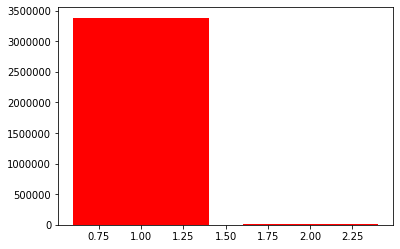

In [11]:
container = df.groupby('Month').sum()
x = range(1, 3)
y = container['Sales']
plt.bar(x, y, color = 'red')